In [3]:
# pip install deep-translator sentence-transformers torch
from deep_translator import GoogleTranslator
from sentence_transformers import SentenceTransformer, util
import time

# Load LaBSE model (multilingual embeddings)
model = SentenceTransformer('sentence-transformers/LaBSE')

input_file = "Form.txt"
output_file = "output_telugu.txt"

with open(input_file, 'r', encoding='utf-8') as infile:
    lines = [line.strip() for line in infile if line.strip()]

with open(output_file, 'w', encoding='utf-8') as outfile:
    for line in lines:
        translated = ""
        retries = 3
        while retries > 0:
            try:
                translated = GoogleTranslator(source='en', target='te').translate(line)
                break
            except Exception as e:
                print(f"Translation failed for line: {line}")
                print("Error:", e)
                retries -= 1
                time.sleep(1)

        if not translated:
            translated = line  # fallback

        # --- Validation with LaBSE ---
        embeddings = model.encode([line, translated], convert_to_tensor=True)
        sim_score = util.cos_sim(embeddings[0], embeddings[1]).item()

        # Save translation + score
        outfile.write(translated + f"  ||  SIMILARITY: {sim_score:.3f}\n")

        # Throttle API calls
        time.sleep(0.5)

print("Done! See", output_file)


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

C:\Users\HAI\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HAI\.cache\huggingface\hub\models--sentence-transformers--LaBSE. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Done! See output_telugu.txt



Translations complete. See output_telugu13.txt


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Recall@1: 0.973
Recall@5: 1.000


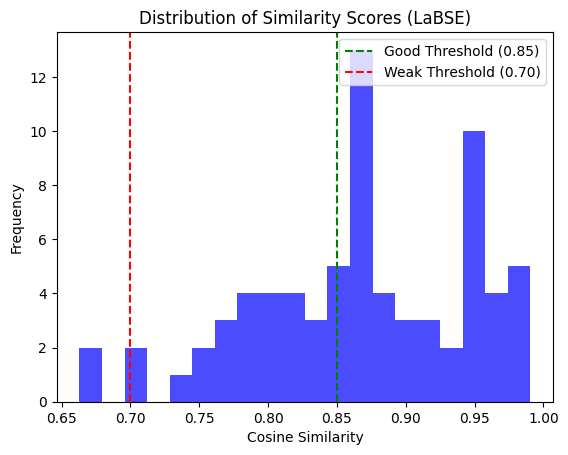

Suspicious low-score sections saved to suspicious_sections.txt


In [1]:
# pip install deep-translator sentence-transformers torch matplotlib

from deep_translator import GoogleTranslator
from sentence_transformers import SentenceTransformer, util
import time
import matplotlib.pyplot as plt
import numpy as np

# Load LaBSE model (multilingual embeddings)
model = SentenceTransformer('sentence-transformers/LaBSE')

input_file = "Form.txt"
output_file = "output_telugu13.txt"

# --- Step 1: Read English lines ---
with open(input_file, 'r', encoding='utf-8') as infile:
    lines = [line.strip() for line in infile if line.strip()]

translations = []

# --- Step 2: Translate each line ---
with open(output_file, 'w', encoding='utf-8') as outfile:
    for line in lines:
        translated = ""
        retries = 3
        while retries > 0:
            try:
                translated = GoogleTranslator(source='en', target='te').translate(line)
                break
            except Exception as e:
                print(f"Translation failed for line: {line}")
                print("Error:", e)
                retries -= 1
                time.sleep(1)

        if not translated:
            translated = line  # fallback

        translations.append(translated)

        # --- Quick similarity check per line ---
        embeddings = model.encode([line, translated], convert_to_tensor=True)
        sim_score = util.cos_sim(embeddings[0], embeddings[1]).item()

        outfile.write(translated + f"  ||  SIMILARITY: {sim_score:.3f}\n")
        time.sleep(0.5)  # Throttle API calls

print("Translations complete. See", output_file)

# --- Step 3: Compute embeddings for retrieval ---
emb_en = model.encode(lines, convert_to_tensor=True, show_progress_bar=True)
emb_te = model.encode(translations, convert_to_tensor=True, show_progress_bar=True)

# --- Step 4: Retrieval Check (Recall@1 and Recall@5) ---
recall_at_1 = 0
recall_at_5 = 0

for i in range(len(lines)):
    sims = util.cos_sim(emb_en[i], emb_te)[0]
    topk_idx = sims.argsort(descending=True)[:5]  # top 5 matches
    if i in topk_idx[:1]:
        recall_at_1 += 1
    if i in topk_idx:
        recall_at_5 += 1

recall_at_1 /= len(lines)
recall_at_5 /= len(lines)

print(f"Recall@1: {recall_at_1:.3f}")
print(f"Recall@5: {recall_at_5:.3f}")

# --- Step 5: Distributional Consistency ---
similarities = [util.cos_sim(emb_en[i], emb_te[i]).item() for i in range(len(lines))]

plt.hist(similarities, bins=20, alpha=0.7, color='blue')
plt.title("Distribution of Similarity Scores (LaBSE)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.axvline(0.85, color='green', linestyle='--', label='Good Threshold (0.85)')
plt.axvline(0.70, color='red', linestyle='--', label='Weak Threshold (0.70)')
plt.legend()
plt.show()

# --- Step 6: Save low-score suspicious sections ---
with open("suspicious_sections.txt", "w", encoding="utf-8") as f:
    for i, score in enumerate(similarities):
        if score < 0.70:  # threshold for suspicious translations
            f.write(f"EN: {lines[i]}\nTE: {translations[i]}\nSIM: {score:.3f}\n\n")

print("Suspicious low-score sections saved to suspicious_sections.txt")



✅ Translations complete. Saved to output_telugu131.txt


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

📊 Recall@1: 0.973
📊 Recall@5: 1.000


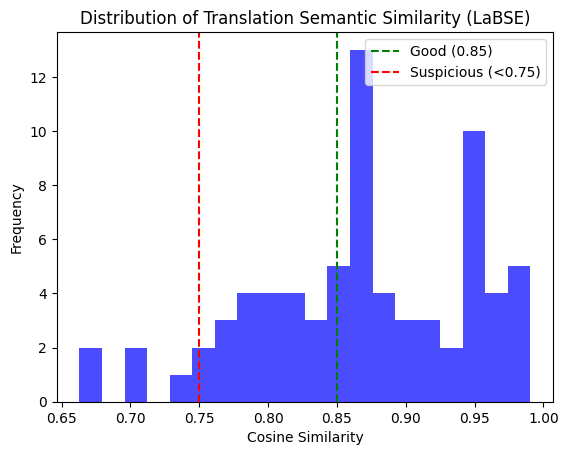

⚠️ Suspicious translations (score < 0.75) saved to suspicious_sections.txt


In [1]:
# pip install deep-translator sentence-transformers torch matplotlib

from deep_translator import GoogleTranslator
from sentence_transformers import SentenceTransformer, util
import time
import matplotlib.pyplot as plt
import numpy as np

# --- Load LaBSE multilingual embedding model ---
model = SentenceTransformer('sentence-transformers/LaBSE')

input_file = "Form.txt"
output_file = "output_telugu131.txt"

# --- Step 1: Read English lines ---
with open(input_file, 'r', encoding='utf-8') as infile:
    lines = [line.strip() for line in infile if line.strip()]

translations = []

# --- Step 2: Translate each line ---
with open(output_file, 'w', encoding='utf-8') as outfile:
    for line in lines:
        translated = ""
        retries = 3
        while retries > 0:
            try:
                translated = GoogleTranslator(source='en', target='te').translate(line)
                break
            except Exception as e:
                print(f"Translation failed for line: {line}")
                print("Error:", e)
                retries -= 1
                time.sleep(1)

        if not translated:
            translated = line  # fallback if translation fails

        translations.append(translated)
        outfile.write(translated + "\n")  # no similarity score shown
        time.sleep(0.5)  # to avoid rate limiting

print("✅ Translations complete. Saved to", output_file)

# --- Step 3: Compute embeddings for retrieval evaluation ---
emb_en = model.encode(lines, convert_to_tensor=True, show_progress_bar=True)
emb_te = model.encode(translations, convert_to_tensor=True, show_progress_bar=True)

# --- Step 4: Retrieval Check (Recall@1 and Recall@5) ---
recall_at_1 = 0
recall_at_5 = 0

for i in range(len(lines)):
    sims = util.cos_sim(emb_en[i], emb_te)[0]
    topk_idx = sims.argsort(descending=True)[:5]
    if i in topk_idx[:1]:
        recall_at_1 += 1
    if i in topk_idx:
        recall_at_5 += 1

recall_at_1 /= len(lines)
recall_at_5 /= len(lines)

print(f"📊 Recall@1: {recall_at_1:.3f}")
print(f"📊 Recall@5: {recall_at_5:.3f}")

# --- Step 5: Distribution Consistency (Semantic Similarity Histogram) ---
similarities = [util.cos_sim(emb_en[i], emb_te[i]).item() for i in range(len(lines))]

plt.hist(similarities, bins=20, alpha=0.7, color='blue')
plt.title("Distribution of Translation Semantic Similarity (LaBSE)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.axvline(0.85, color='green', linestyle='--', label='Good (0.85)')
plt.axvline(0.75, color='red', linestyle='--', label='Suspicious (<0.75)')
plt.legend()
plt.show()

# --- Step 6: Save suspicious low-score translations (<0.75) ---
with open("suspicious_sections.txt", "w", encoding="utf-8") as f:
    for i, score in enumerate(similarities):
        if score < 0.75:  # threshold for suspicious translation
            f.write(f"EN: {lines[i]}\n")
            f.write(f"TE: {translations[i]}\n\n")

print("⚠️ Suspicious translations (score < 0.75) saved to suspicious_sections.txt")


✅ Translations complete. Saved to output_telugu1312.txt


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

📊 Recall@1: 0.973
📊 Recall@5: 1.000


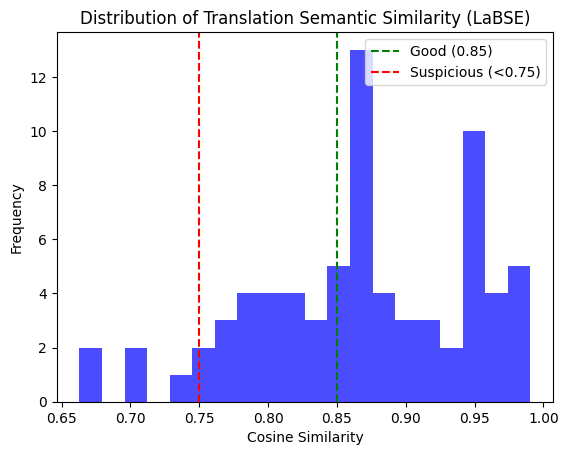

⚠️ Suspicious translations (score < 0.75) saved to suspicious_sections.txt


In [2]:
# pip install deep-translator sentence-transformers torch matplotlib

from deep_translator import GoogleTranslator
from sentence_transformers import SentenceTransformer, util
import time
import matplotlib.pyplot as plt
import numpy as np

# --- Load LaBSE multilingual embedding model ---
model = SentenceTransformer('sentence-transformers/LaBSE')

input_file = "Form.txt"
output_file = "output_telugu1312.txt"

# --- Step 1: Read English lines ---
with open(input_file, 'r', encoding='utf-8') as infile:
    lines = [line.strip() for line in infile if line.strip()]

translations = []

# --- Step 2: Translate each line ---
with open(output_file, 'w', encoding='utf-8') as outfile:
    for line in lines:
        translated = ""
        retries = 3
        while retries > 0:
            try:
                translated = GoogleTranslator(source='en', target='te').translate(line)
                break
            except Exception as e:
                print(f"Translation failed for line: {line}")
                print("Error:", e)
                retries -= 1
                time.sleep(1)

        if not translated:
            translated = line  # fallback if translation fails

        translations.append(translated)
        outfile.write(translated + "\n")  # no similarity score shown
        time.sleep(0.5)  # throttle API calls

print("✅ Translations complete. Saved to", output_file)

# --- Step 3: Compute embeddings for retrieval evaluation ---
emb_en = model.encode(lines, convert_to_tensor=True, show_progress_bar=True)
emb_te = model.encode(translations, convert_to_tensor=True, show_progress_bar=True)

# --- Step 4: Retrieval Check (Recall@1 and Recall@5) ---
recall_at_1 = 0
recall_at_5 = 0

for i in range(len(lines)):
    sims = util.cos_sim(emb_en[i], emb_te)[0]
    topk_idx = sims.argsort(descending=True)[:5]
    if i in topk_idx[:1]:
        recall_at_1 += 1
    if i in topk_idx:
        recall_at_5 += 1

recall_at_1 /= len(lines)
recall_at_5 /= len(lines)

print(f"📊 Recall@1: {recall_at_1:.3f}")
print(f"📊 Recall@5: {recall_at_5:.3f}")

# --- Step 5: Distribution Consistency (Semantic Similarity Histogram) ---
similarities = [util.cos_sim(emb_en[i], emb_te[i]).item() for i in range(len(lines))]

plt.hist(similarities, bins=20, alpha=0.7, color='blue')
plt.title("Distribution of Translation Semantic Similarity (LaBSE)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.axvline(0.85, color='green', linestyle='--', label='Good (0.85)')
plt.axvline(0.75, color='red', linestyle='--', label='Suspicious (<0.75)')
plt.legend()
plt.show()

# --- Step 6: Save suspicious low-score translations (<0.75) ---
with open("suspicious_sections.txt", "w", encoding="utf-8") as f:
    for i, score in enumerate(similarities):
        if score < 0.75:  # threshold for suspicious translation
            f.write(f"Line {i+1}\n")
            f.write(f"EN: {lines[i]}\n")
            f.write(f"TE: {translations[i]}\n")
            f.write(f"Semantic Similarity: {score:.3f}\n\n")

print("⚠️ Suspicious translations (score < 0.75) saved to suspicious_sections.txt")



📘 Loaded 46 paragraphs from Form.txt


Translating: 100%|█████████████████████████████████████████████████████████████████████| 46/46 [01:21<00:00,  1.78s/it]


✅ Translations saved to output_telugu_fixed.txt
🔍 Loading LaBSE model...


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

📊 Recall@1: 0.978
📊 Recall@5: 1.000


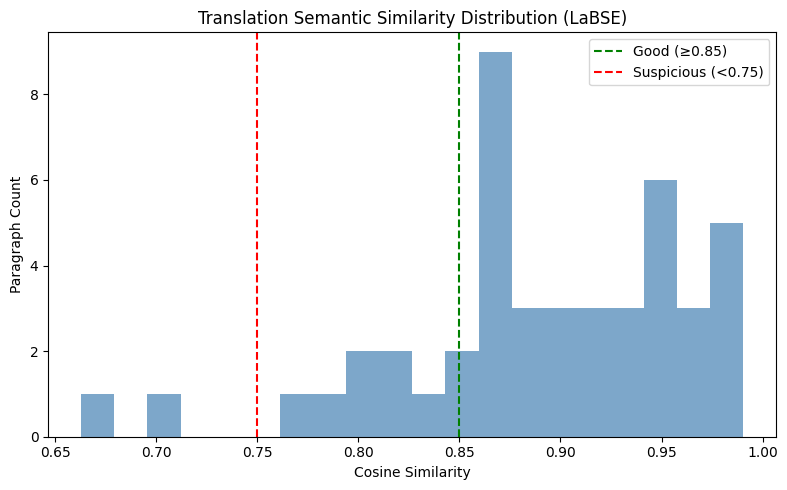

⚠️ Suspicious translations saved to suspicious_sections.txt


In [1]:
# pip install deep-translator sentence-transformers torch matplotlib tqdm

import time
import re
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from deep_translator import GoogleTranslator
from sentence_transformers import SentenceTransformer, util

# ==========================================================
# CONFIG
# ==========================================================
INPUT_FILE = "Form.txt"
OUTPUT_FILE = "output_telugu_fixed.txt"
SUSPICIOUS_FILE = "suspicious_sections.txt"
TARGET_LANG = "te"  # Telugu
SIMILARITY_THRESHOLD = 0.75

# ==========================================================
# STEP 1: LOAD AND CHUNK TEXT BY PARAGRAPH
# ==========================================================
def load_paragraphs(path):
    with open(path, "r", encoding="utf-8") as f:
        text = f.read()
    # Split by double newlines or large gaps
    paragraphs = re.split(r'\n\s*\n+', text.strip())
    paragraphs = [p.strip() for p in paragraphs if len(p.strip()) > 5]
    return paragraphs

paragraphs = load_paragraphs(INPUT_FILE)
print(f"📘 Loaded {len(paragraphs)} paragraphs from {INPUT_FILE}")

# ==========================================================
# STEP 2: TRANSLATE PARAGRAPHS
# ==========================================================
def translate_paragraphs(paragraphs, src='en', tgt='te'):
    translated = []
    translator = GoogleTranslator(source=src, target=tgt)
    
    for i, para in enumerate(tqdm(paragraphs, desc="Translating")):
        success = False
        for attempt in range(5):  # Retry up to 5 times
            try:
                text_te = translator.translate(para)
                if text_te:
                    translated.append(text_te)
                    success = True
                    break
            except Exception as e:
                print(f"⚠️ Retry {attempt+1}/5 failed for paragraph {i+1}: {e}")
                time.sleep(1 + attempt * 2)
        if not success:
            translated.append(para)  # fallback
        time.sleep(0.4)  # avoid throttling
    return translated

translations = translate_paragraphs(paragraphs, 'en', TARGET_LANG)

with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
    for p in translations:
        f.write(p.strip() + "\n\n")

print(f"✅ Translations saved to {OUTPUT_FILE}")

# ==========================================================
# STEP 3: LOAD EMBEDDING MODEL (LaBSE)
# ==========================================================
print("🔍 Loading LaBSE model...")
model = SentenceTransformer('sentence-transformers/LaBSE')

# Batch encode for speed
emb_en = model.encode(paragraphs, batch_size=16, convert_to_tensor=True, show_progress_bar=True)
emb_te = model.encode(translations, batch_size=16, convert_to_tensor=True, show_progress_bar=True)

# ==========================================================
# STEP 4: EVALUATE SEMANTIC SIMILARITY
# ==========================================================
similarities = [util.cos_sim(emb_en[i], emb_te[i]).item() for i in range(len(paragraphs))]

recall_at_1 = 0
recall_at_5 = 0
for i in range(len(paragraphs)):
    sims = util.cos_sim(emb_en[i], emb_te)[0]
    topk = sims.argsort(descending=True)[:5]
    if i in topk[:1]:
        recall_at_1 += 1
    if i in topk:
        recall_at_5 += 1

recall_at_1 /= len(paragraphs)
recall_at_5 /= len(paragraphs)

print(f"📊 Recall@1: {recall_at_1:.3f}")
print(f"📊 Recall@5: {recall_at_5:.3f}")

# ==========================================================
# STEP 5: VISUALIZE DISTRIBUTION
# ==========================================================
plt.figure(figsize=(8, 5))
plt.hist(similarities, bins=20, alpha=0.7, color='steelblue')
plt.title("Translation Semantic Similarity Distribution (LaBSE)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Paragraph Count")
plt.axvline(0.85, color='green', linestyle='--', label='Good (≥0.85)')
plt.axvline(SIMILARITY_THRESHOLD, color='red', linestyle='--', label='Suspicious (<0.75)')
plt.legend()
plt.tight_layout()
plt.show()

# ==========================================================
# STEP 6: SAVE LOW-SCORE TRANSLATIONS
# ==========================================================
with open(SUSPICIOUS_FILE, "w", encoding="utf-8") as f:
    for i, score in enumerate(similarities):
        if score < SIMILARITY_THRESHOLD:
            f.write(f"=== Paragraph {i+1} ===\n")
            f.write(f"EN: {paragraphs[i]}\n")
            f.write(f"TE: {translations[i]}\n")
            f.write(f"Semantic Similarity: {score:.3f}\n\n")

print(f"⚠️ Suspicious translations saved to {SUSPICIOUS_FILE}")


📘 Loaded 7 paragraphs from table.txt


Translating: 100%|███████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.40s/it]


✅ Translations saved to TEST_telugu_fixed.txt
🔍 Loading LaBSE model...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📊 Recall@1: 1.000
📊 Recall@5: 1.000


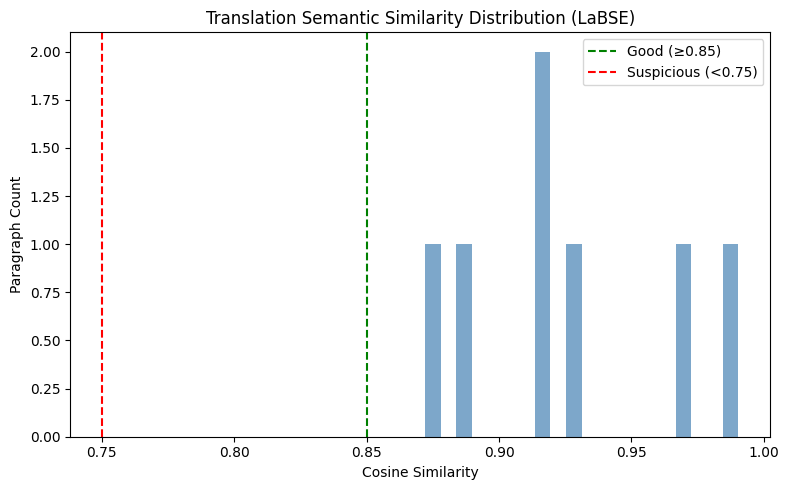

⚠️ Suspicious translations saved to suspicious_sections_test.txt


In [2]:
# pip install deep-translator sentence-transformers torch matplotlib tqdm

import time
import re
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from deep_translator import GoogleTranslator
from sentence_transformers import SentenceTransformer, util

# ==========================================================
# CONFIG
# ==========================================================
INPUT_FILE = "table.txt"
OUTPUT_FILE = "TEST_telugu_fixed.txt"
SUSPICIOUS_FILE = "suspicious_sections_test.txt"
TARGET_LANG = "te"  # Telugu
SIMILARITY_THRESHOLD = 0.75

# ==========================================================
# STEP 1: LOAD AND CHUNK TEXT BY PARAGRAPH
# ==========================================================
def load_paragraphs(path):
    with open(path, "r", encoding="utf-8") as f:
        text = f.read()
    # Split by double newlines or large gaps
    paragraphs = re.split(r'\n\s*\n+', text.strip())
    paragraphs = [p.strip() for p in paragraphs if len(p.strip()) > 5]
    return paragraphs

paragraphs = load_paragraphs(INPUT_FILE)
print(f"📘 Loaded {len(paragraphs)} paragraphs from {INPUT_FILE}")

# ==========================================================
# STEP 2: TRANSLATE PARAGRAPHS
# ==========================================================
def translate_paragraphs(paragraphs, src='en', tgt='te'):
    translated = []
    translator = GoogleTranslator(source=src, target=tgt)
    
    for i, para in enumerate(tqdm(paragraphs, desc="Translating")):
        success = False
        for attempt in range(5):  # Retry up to 5 times
            try:
                text_te = translator.translate(para)
                if text_te:
                    translated.append(text_te)
                    success = True
                    break
            except Exception as e:
                print(f"⚠️ Retry {attempt+1}/5 failed for paragraph {i+1}: {e}")
                time.sleep(1 + attempt * 2)
        if not success:
            translated.append(para)  # fallback
        time.sleep(0.4)  # avoid throttling
    return translated

translations = translate_paragraphs(paragraphs, 'en', TARGET_LANG)

with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
    for p in translations:
        f.write(p.strip() + "\n\n")

print(f"✅ Translations saved to {OUTPUT_FILE}")

# ==========================================================
# STEP 3: LOAD EMBEDDING MODEL (LaBSE)
# ==========================================================
print("🔍 Loading LaBSE model...")
model = SentenceTransformer('sentence-transformers/LaBSE')

# Batch encode for speed
emb_en = model.encode(paragraphs, batch_size=16, convert_to_tensor=True, show_progress_bar=True)
emb_te = model.encode(translations, batch_size=16, convert_to_tensor=True, show_progress_bar=True)

# ==========================================================
# STEP 4: EVALUATE SEMANTIC SIMILARITY
# ==========================================================
similarities = [util.cos_sim(emb_en[i], emb_te[i]).item() for i in range(len(paragraphs))]

recall_at_1 = 0
recall_at_5 = 0
for i in range(len(paragraphs)):
    sims = util.cos_sim(emb_en[i], emb_te)[0]
    topk = sims.argsort(descending=True)[:5]
    if i in topk[:1]:
        recall_at_1 += 1
    if i in topk:
        recall_at_5 += 1
f
recall_at_1 /= len(paragraphs)
recall_at_5 /= len(paragraphs)

print(f"📊 Recall@1: {recall_at_1:.3f}")
print(f"📊 Recall@5: {recall_at_5:.3f}")

# ==========================================================
# STEP 5: VISUALIZE DISTRIBUTION
# ==========================================================
plt.figure(figsize=(8, 5))
plt.hist(similarities, bins=20, alpha=0.7, color='steelblue')
plt.title("Translation Semantic Similarity Distribution (LaBSE)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Paragraph Count")
plt.axvline(0.85, color='green', linestyle='--', label='Good (≥0.85)')
plt.axvline(SIMILARITY_THRESHOLD, color='red', linestyle='--', label='Suspicious (<0.75)')
plt.legend()
plt.tight_layout()
plt.show()

# ==========================================================
# STEP 6: SAVE LOW-SCORE TRANSLATIONS
# ==========================================================
with open(SUSPICIOUS_FILE, "w", encoding="utf-8") as f:
    for i, score in enumerate(similarities):
        if score < SIMILARITY_THRESHOLD:
            f.write(f"=== Paragraph {i+1} ===\n")
            f.write(f"EN: {paragraphs[i]}\n")
            f.write(f"TE: {translations[i]}\n")
            f.write(f"Semantic Similarity: {score:.3f}\n\n")

print(f"⚠️ Suspicious translations saved to {SUSPICIOUS_FILE}")


📄 Extracting text and preserving layout...
📘 Loaded 46 paragraphs from Form.txt


Translating: 100%|█████████████████████████████████████████████████████████████████████| 46/46 [01:21<00:00,  1.76s/it]


✅ Translations saved to TEST_french_fixed.txt
🔍 Loading LaBSE model...


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

📊 Recall@1: 0.978
📊 Recall@5: 1.000


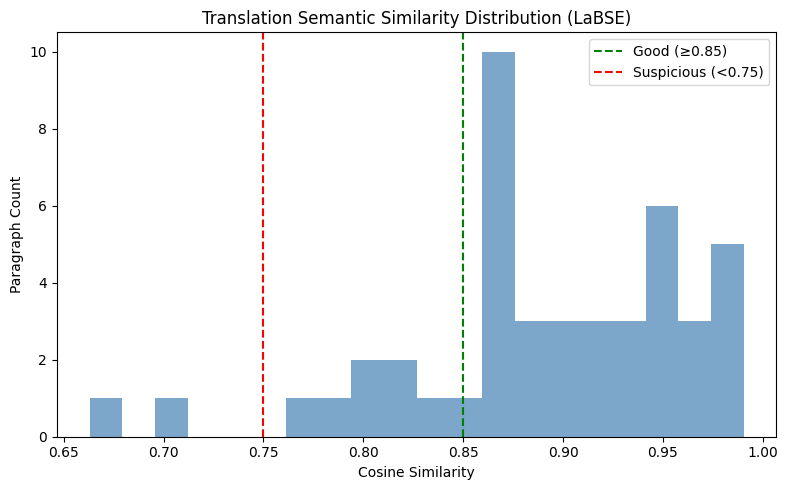

⚠️ Suspicious translations saved to suspicious_sections_test.txt


In [3]:
# ==========================================================
# Install (only first run)
# ==========================================================
# pip install -q deep-translator sentence-transformers torch matplotlib tqdm python-docx pdfplumber PyMuPDF pytesseract Pillow

import os, re, time, pdfplumber, pytesseract
import matplotlib.pyplot as plt
from tqdm import tqdm
from deep_translator import GoogleTranslator
from sentence_transformers import SentenceTransformer, util
from docx import Document
from docx.document import Document as _Document
from docx.oxml.text.paragraph import CT_P
from docx.oxml.table import CT_Tbl
from docx.text.paragraph import Paragraph
from docx.table import Table
from PIL import Image

# ==========================================================
# CONFIG
# ==========================================================
INPUT_FILE = "Form.txt"         # txt, pdf, or docx
OUTPUT_FILE = "TEST_french_fixed.txt"
SUSPICIOUS_FILE = "suspicious_sections_test.txt"
TARGET_LANG = "te"               # Telugu
SIMILARITY_THRESHOLD = 0.75

# ==========================================================
# HELPER: Iterate DOCX blocks preserving order
# ==========================================================
def iter_block_items(parent):
    if not isinstance(parent, _Document):
        raise ValueError("Unsupported parent for block items")
    for child in parent.element.body:
        if isinstance(child, CT_P):
            yield Paragraph(child, parent)
        elif isinstance(child, CT_Tbl):
            yield Table(child, parent)

# ==========================================================
# DOCX Extraction
# ==========================================================
def extract_from_docx(path):
    doc = Document(path)
    elements = []
    for block in iter_block_items(doc):
        if isinstance(block, Paragraph):
            elements.append({
                "type": "paragraph",
                "text": block.text,
                "indent": getattr(block.paragraph_format.left_indent, 'pt', 0) or 0
            })
        else:
            data = [[cell.text for cell in row.cells] for row in block.rows]
            elements.append({"type": "table", "data": data})
    return elements

# ==========================================================
# PDF Extraction (text + OCR fallback)
# ==========================================================
def extract_from_pdf(path):
    elements = []
    with pdfplumber.open(path) as pdf:
        for i, page in enumerate(pdf.pages, 1):
            elements.append({"type": "page_break", "page": i})
            txt = page.extract_text(layout=True)
            if txt and txt.strip():
                elements.append({"type": "paragraph", "text": txt})
            else:
                img = page.to_image(resolution=300).original.convert("RGB")
                text = pytesseract.image_to_string(img)
                elements.append({"type": "paragraph", "text": text})
    return elements

# ==========================================================
# TXT Extraction (preserve spacing and tables)
# ==========================================================
def extract_from_txt(path):
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        raw_lines = f.readlines()

    blocks, block = [], []
    for line in raw_lines:
        if line.strip():
            block.append(line.rstrip("\n"))
        else:
            if block:
                blocks.append(block)
                block = []
    if block:
        blocks.append(block)

    elements = []
    for b in blocks:
        if all(re.search(r"\s{2,}", l) for l in b):  # looks like table
            data = [re.split(r"\s{2,}", l.strip()) for l in b]
            elements.append({"type": "table", "data": data})
        else:
            text = "\n".join(b)
            elements.append({"type": "paragraph", "text": text})
    return elements

# ==========================================================
# FORMAT ELEMENTS BACK TO TEXT (layout preserved)
# ==========================================================
def format_elements(elements):
    lines = []
    for el in elements:
        if el["type"] == "table":
            if not el["data"]: continue
            cols = list(zip(*el["data"]))
            widths = [max(len(str(c)) for c in col) for col in cols]
            for row in el["data"]:
                padded = [str(c).ljust(w) for c, w in zip(row, widths)]
                lines.append("  ".join(padded))
            lines.append("")  # spacing after table
        elif el["type"] == "paragraph":
            lines.append(el["text"])
            lines.append("")
        elif el["type"] == "page_break":
            lines.append(f"\n--- Page {el['page']} ---\n")
    return "\n".join(lines)

# ==========================================================
# CONVERT INPUT FILE → FORMATTED TXT
# ==========================================================
def convert_to_txt(input_path):
    ext = os.path.splitext(input_path)[1].lower()
    if ext == ".docx":
        elements = extract_from_docx(input_path)
    elif ext == ".pdf":
        elements = extract_from_pdf(input_path)
    elif ext == ".txt":
        elements = extract_from_txt(input_path)
    else:
        raise ValueError(f"Unsupported file type: {ext}")
    return format_elements(elements)

# ==========================================================
# TRANSLATION
# ==========================================================
def translate_paragraphs(paragraphs, src='en', tgt='fr'):
    translated = []
    translator = GoogleTranslator(source=src, target=tgt)
    for i, para in enumerate(tqdm(paragraphs, desc="Translating")):
        text_te, success = "", False
        for attempt in range(5):
            try:
                text_te = translator.translate(para)
                if text_te:
                    success = True
                    break
            except Exception as e:
                print(f"⚠️ Retry {attempt+1}/5 failed for paragraph {i+1}: {e}")
                time.sleep(1 + attempt * 2)
        translated.append(text_te if success else para)
        time.sleep(0.4)
    return translated

# ==========================================================
# MAIN PIPELINE
# ==========================================================
if __name__ == "__main__":
    print("📄 Extracting text and preserving layout...")
    full_text = convert_to_txt(INPUT_FILE)

    # Split into paragraphs by double newlines
    paragraphs = re.split(r'\n\s*\n+', full_text.strip())
    paragraphs = [p.strip() for p in paragraphs if len(p.strip()) > 5]
    print(f"📘 Loaded {len(paragraphs)} paragraphs from {INPUT_FILE}")

    # Translate
    translations = translate_paragraphs(paragraphs, 'en', TARGET_LANG)
    with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
        for p in translations:
            f.write(p.strip() + "\n\n")
    print(f"✅ Translations saved to {OUTPUT_FILE}")

    # Load model and compute similarity
    print("🔍 Loading LaBSE model...")
    model = SentenceTransformer('sentence-transformers/LaBSE')
    emb_en = model.encode(paragraphs, batch_size=16, convert_to_tensor=True, show_progress_bar=True)
    emb_te = model.encode(translations, batch_size=16, convert_to_tensor=True, show_progress_bar=True)

    similarities = [util.cos_sim(emb_en[i], emb_te[i]).item() for i in range(len(paragraphs))]

    recall_at_1 = 0
    recall_at_5 = 0
    for i in range(len(paragraphs)):
        sims = util.cos_sim(emb_en[i], emb_te)[0]
        topk = sims.argsort(descending=True)[:5]
        if i in topk[:1]:
            recall_at_1 += 1
        if i in topk:
            recall_at_5 += 1
    recall_at_1 /= len(paragraphs)
    recall_at_5 /= len(paragraphs)

    print(f"📊 Recall@1: {recall_at_1:.3f}")
    print(f"📊 Recall@5: {recall_at_5:.3f}")

    # Visualize
    plt.figure(figsize=(8, 5))
    plt.hist(similarities, bins=20, alpha=0.7, color='steelblue')
    plt.title("Translation Semantic Similarity Distribution (LaBSE)")
    plt.xlabel("Cosine Similarity")
    plt.ylabel("Paragraph Count")
    plt.axvline(0.85, color='green', linestyle='--', label='Good (≥0.85)')
    plt.axvline(SIMILARITY_THRESHOLD, color='red', linestyle='--', label='Suspicious (<0.75)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Save suspicious
    with open(SUSPICIOUS_FILE, "w", encoding="utf-8") as f:
        for i, score in enumerate(similarities):
            if score < SIMILARITY_THRESHOLD:
                f.write(f"=== Paragraph {i+1} ===\n")
                f.write(f"EN: {paragraphs[i]}\n")
                f.write(f"TE: {translations[i]}\n")
                f.write(f"Semantic Similarity: {score:.3f}\n\n")

    print(f"⚠️ Suspicious translations saved to {SUSPICIOUS_FILE}")
